<a href="https://colab.research.google.com/github/YuHsin-Chen1221/Computational-Neural-Science/blob/main/Psychiatric_Disorders_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install kaggle

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d shashwatwork/eeg-psychiatric-disorders-dataset

Dataset URL: https://www.kaggle.com/datasets/shashwatwork/eeg-psychiatric-disorders-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/4.72M [00:00<?, ?B/s]
100% 4.72M/4.72M [00:00<00:00, 169MB/s]


In [5]:
!unzip /content/eeg-psychiatric-disorders-dataset.zip

Archive:  /content/eeg-psychiatric-disorders-dataset.zip
  inflating: EEG.machinelearing_data_BRMH.csv  


In [19]:
# data loading & collecting
import pandas as pd
df = pd.read_csv('/content/EEG.machinelearing_data_BRMH.csv')
df = df.drop(columns=['sex', 'age', 'eeg.date', 'education', 'IQ', 'main.disorder'])
df.head()

,no.,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [20]:
df.rename(columns={"specific.disorder":"specific_disorder"}, inplace = True)
specific_disoders = list(df.specific_disorder.unique())
specific_disoders

['Alcohol use disorder',
 'Acute stress disorder',
 'Depressive disorder',
 'Healthy control',
 'Behavioral addiction disorder',
 'Obsessive compulsitve disorder',
 'Schizophrenia',
 'Panic disorder',
 'Social anxiety disorder',
 'Posttraumatic stress disorder',
 'Adjustment disorder',
 'Bipolar disorder']

In [16]:
# binary labels & data preprocessing
df['label'] = df['specific_disorder'].apply(lambda x: 0 if x == 'Healthy control' else 1)
df = df.drop(columns=['specific_disorder'])
X = df.drop(columns=['label']).values
Y = df['label'].values

# data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [63]:
import numpy as np
print(np.isnan(X_train).any(), np.isinf(X_train).any())
print(np.isnan(Y_train).any(), np.isinf(Y_train).any())

True False
False False


In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:572: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(


In [73]:
# DL solution
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30,
    batch_size=32, callbacks=[early_stop])


Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.4148 - loss: 1.0013 - val_accuracy: 0.1587 - val_loss: 1.2889
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4944 - loss: 0.8367 - val_accuracy: 0.1958 - val_loss: 1.0981
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5119 - loss: 0.8313 - val_accuracy: 0.2593 - val_loss: 0.9948
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5257 - loss: 0.7899 - val_accuracy: 0.3757 - val_loss: 0.9004
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5475 - loss: 0.7067 - val_accuracy: 0.4709 - val_loss: 0.7528
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5914 - loss: 0.6938 - val_accuracy: 0.5026 - val_loss: 0.7434
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6302 - loss: 0.6307 - val_accuracy: 0.5714 - val_loss: 0.6978
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6853 - loss: 0.6055 - val_accuracy: 0.6243 - v

In [77]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 256)            │       292,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 929,925 (3.55 MB)

 Trainable params: 309,761 (1.18 MB)

 Non-trainable params: 640 (2.50 KB)

 Optimizer params: 619,524 (2.36 MB)

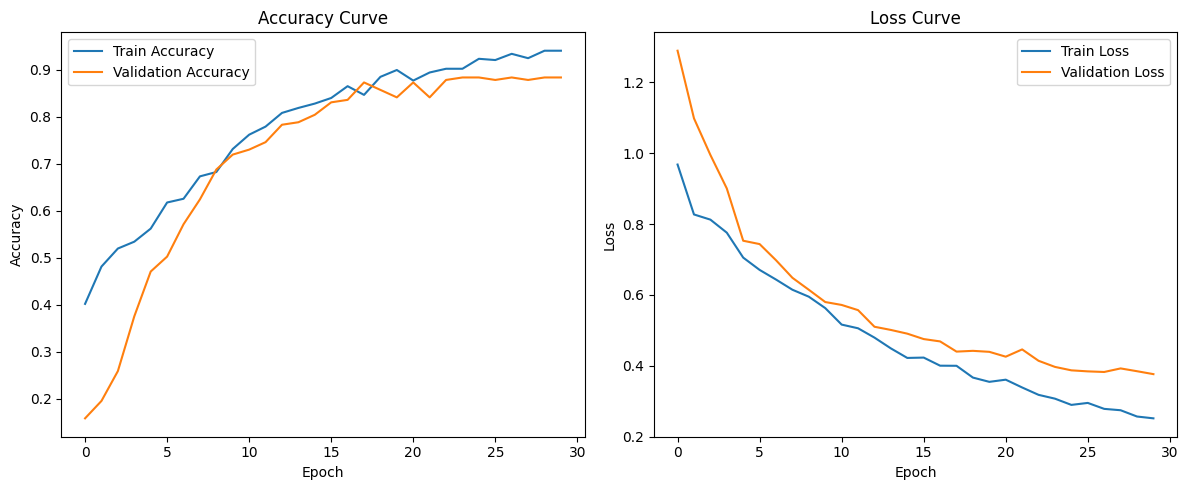

In [74]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [75]:
# ML solution
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)

print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.50      0.05      0.10        19
           1       0.90      0.99      0.95       170

    accuracy                           0.90       189
   macro avg       0.70      0.52      0.52       189
weighted avg       0.86      0.90      0.86       189



In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}

search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                            param_distributions=param_dist,
                            n_iter=50,  # Try fewer or more combinations
                            scoring='f1_macro',  # Or 'accuracy', etc.
                            cv=5, verbose=2, n_jobs=-1)

search.fit(X_train, Y_train)
best_rf = search.best_estimator_
y_pred = best_rf.predict(X_test)
print(classification_report(Y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 

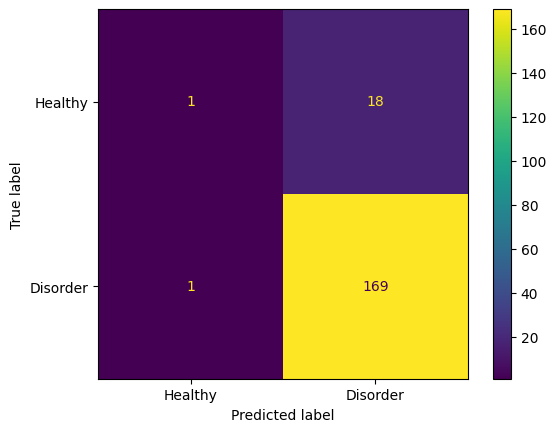

In [76]:
# model evaluation & visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Healthy", "Disorder"]).plot()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:572: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(


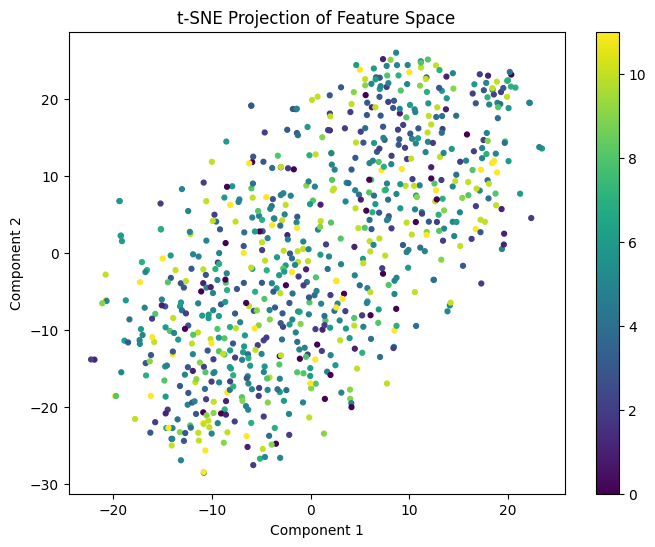

In [88]:
# T-sne: feature extraction & dimensionality reduction
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer
import numpy as np # Import numpy for isnan check


df_analyze = pd.read_csv('/content/EEG.machinelearing_data_BRMH.csv')
df_analyze = df_analyze.drop(columns=['sex', 'age', 'eeg.date', 'education', 'IQ', 'main.disorder'])
df_analyze.rename(columns={"specific.disorder":"specific_disorder"}, inplace = True)

X = df_analyze.drop(columns=['specific_disorder']).values
Y = df_analyze['specific_disorder'].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_numeric = label_encoder.fit_transform(Y_train)

# Impute missing values after scaling
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)

X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y_numeric, cmap='viridis', s=10)
plt.colorbar()
plt.title("t-SNE Projection of Feature Space")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


/tmp/ipython-input-22-1342195020.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disorder_counts.values, y=disorder_counts.index, palette="viridis")


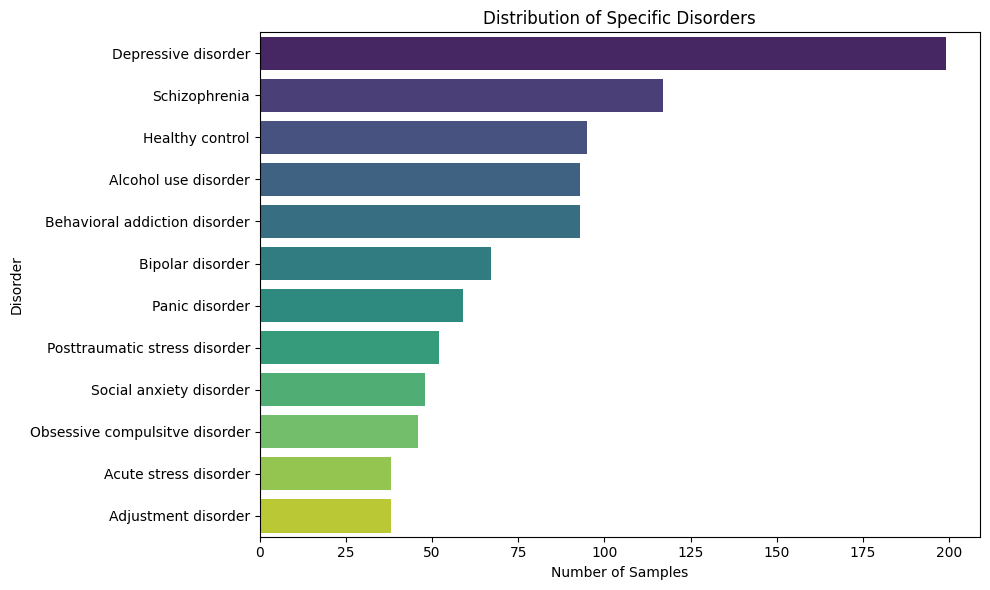

In [22]:
# EDA & Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Specific Disorders Distribution
disorder_counts = df['specific_disorder'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=disorder_counts.values, y=disorder_counts.index, palette="viridis")
plt.title("Distribution of Specific Disorders")
plt.xlabel("Number of Samples")
plt.ylabel("Disorder")
plt.tight_layout()
plt.show()


In [23]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 34.1 MB/s eta 0:00:00


In [34]:
# EEG topographic map
"""
import mne

row = df.iloc[0]

eeg_columns = [col for col in df.columns if 'delta' in col and col.endswith(('FP1', 'FP2', 'F3', 'F4', 'F7',
                                            'F8', 'Fz', 'T3', 'T4', 'T5', 'T6',
                                            'C3', 'C4', 'Cz', 'P3', 'P4', 'Pz', 'O1', 'O2'))]
channels = [col.split('.')[-1].capitalize().replace('Fp', 'Fp') for col in eeg_columns]

values = row[eeg_columns].values.astype(float)
info = mne.create_info(ch_names=channels, sfreq=1000, ch_types='eeg')
info.set_montage('standard_1020')
fig, ax = plt.subplots(figsize=(6, 5))
mne.viz.plot_topomap(values, info, axes=ax, show=True, names=channels, show_names=True)
plt.title(f"Delta Power Topomap for Subject {row['no.']}")
plt.show()
"""


'\nimport mne\n\nrow = df.iloc[0]\n\neeg_columns = [col for col in df.columns if \'delta\' in col and col.endswith((\'FP1\', \'FP2\', \'F3\', \'F4\', \'F7\', \n                                            \'F8\', \'Fz\', \'T3\', \'T4\', \'T5\', \'T6\', \n                                            \'C3\', \'C4\', \'Cz\', \'P3\', \'P4\', \'Pz\', \'O1\', \'O2\'))]\nchannels = [col.split(\'.\')[-1].capitalize().replace(\'Fp\', \'Fp\') for col in eeg_columns]\n\nvalues = row[eeg_columns].values.astype(float)\ninfo = mne.create_info(ch_names=channels, sfreq=1000, ch_types=\'eeg\')\ninfo.set_montage(\'standard_1020\')\nfig, ax = plt.subplots(figsize=(6, 5))\nmne.viz.plot_topomap(values, info, axes=ax, show=True, names=channels, show_names=True)\nplt.title(f"Delta Power Topomap for Subject {row[\'no.\']}")\nplt.show()\n'

In [ ]:
# model for multi-class classification
